In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}

import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import numpy as np

plt.rcParams["figure.figsize"] = (5, 4)

import superscreen as sc
import tdgl

# figure_dir = None
figure_dir = "../latex/figures"

Solution generated by calling `bash squid-single-vortex.sh` in `vortex-dynamics-induced-by-scanning-squid/code/scripts/`:

In [2]:
solution_directory = "../data/simulation/squid-single-vortex"

In [3]:
solution = tdgl.Solution.from_hdf5(os.path.join(solution_directory, "output-0.h5"))

In [4]:
sc_solution = sc.Solution.from_file(os.path.join(solution_directory, "squid_solution"))

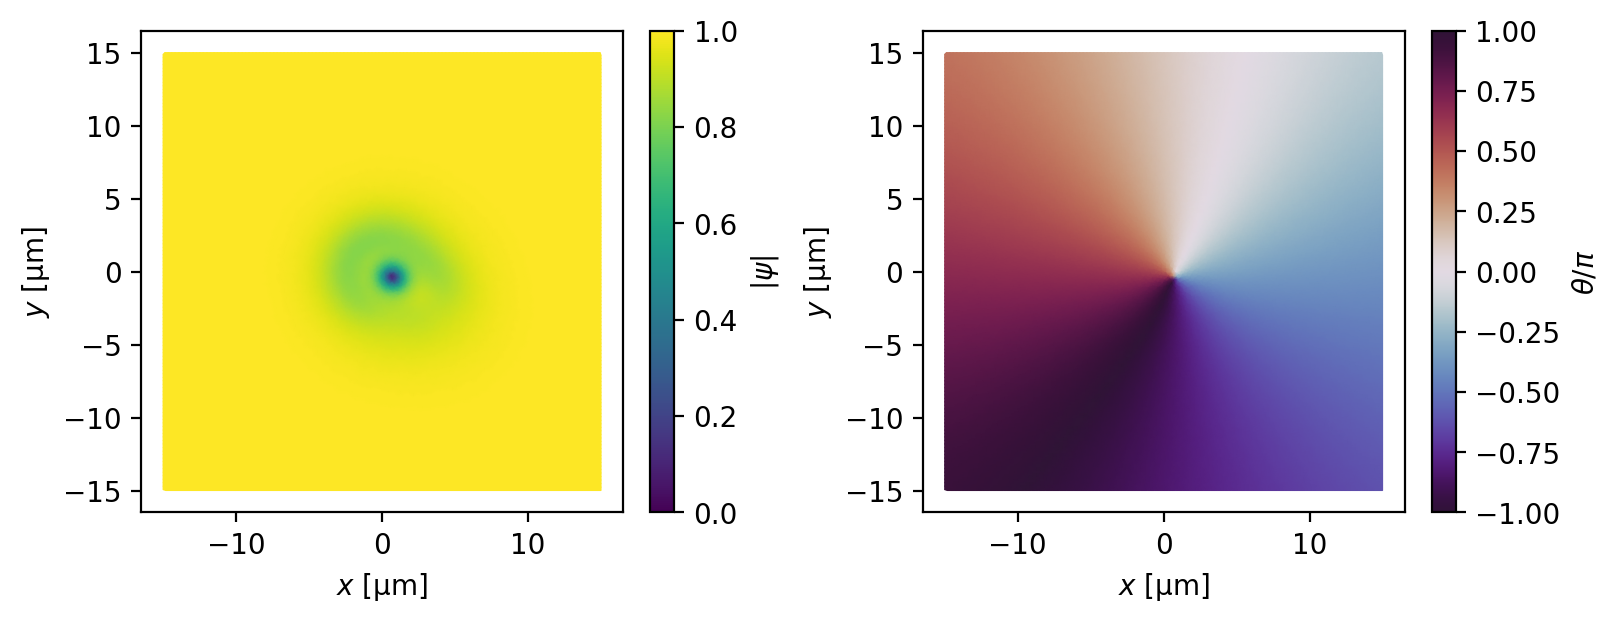

In [5]:
_ = solution.plot_order_parameter()

In [6]:
K = solution.current_density

In [7]:
Kmax = np.sqrt(np.sum(K**2, axis=1)).max()
print(Kmax)

14.526677792686062 microampere / micrometer


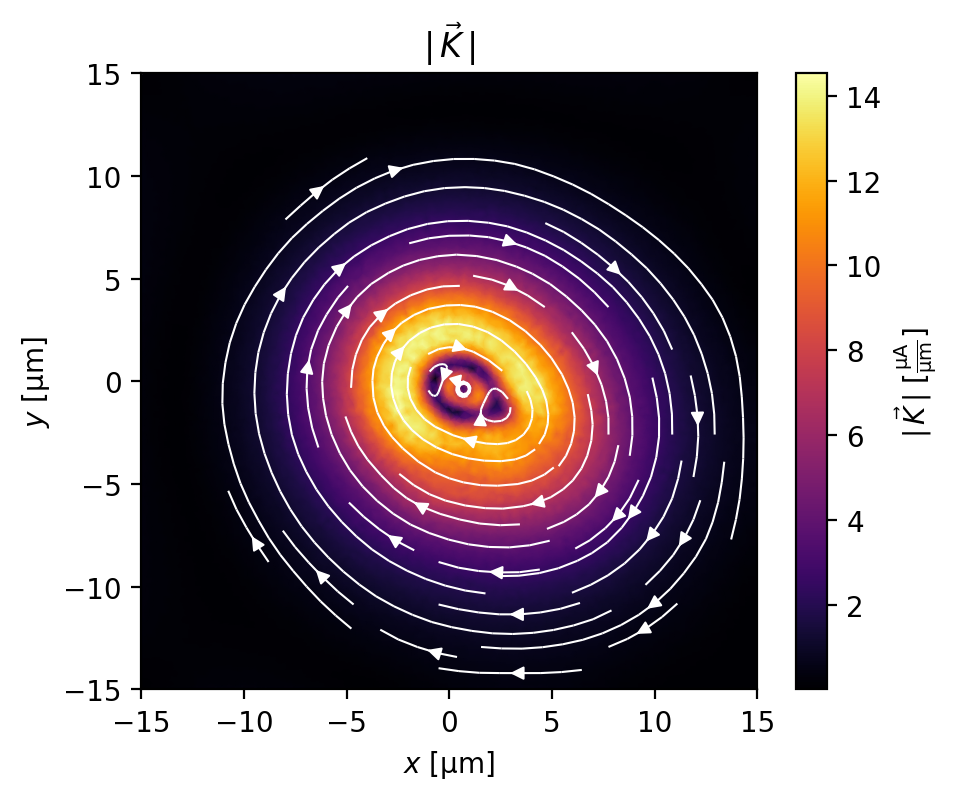

In [8]:
_ = solution.plot_currents()

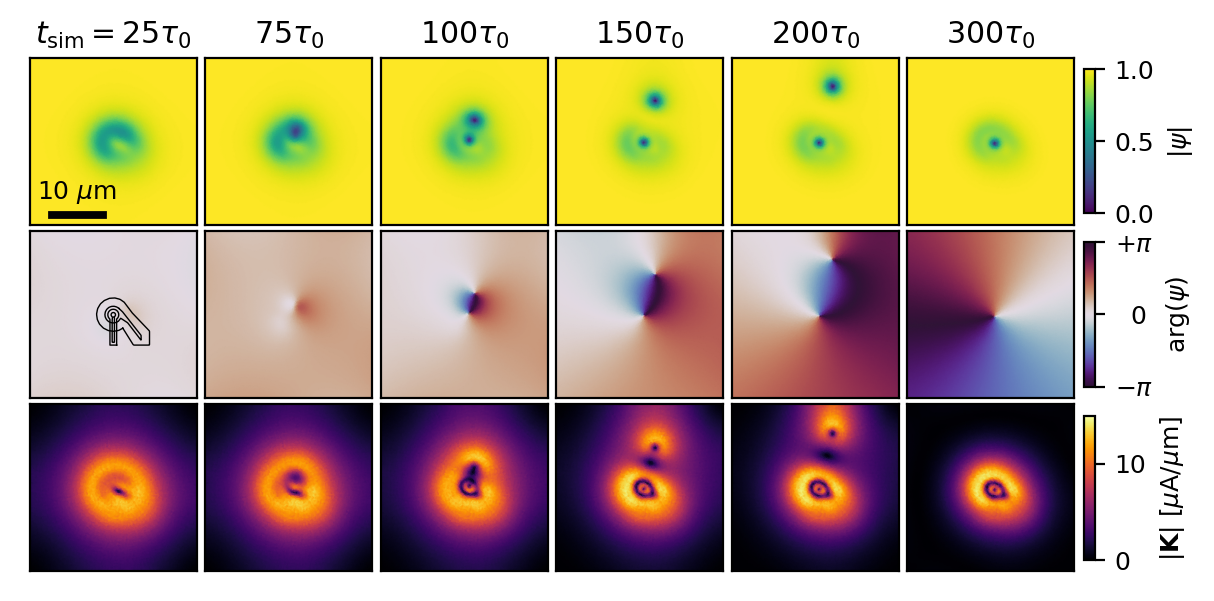

In [9]:
plt.rcParams["font.size"] = 9

times = [25, 75, 100, 150, 200, 300]

fig, axes = plt.subplots(
    3, len(times), figsize=(8, 3.5),
    gridspec_kw=dict(hspace=-0.1, wspace=0.05),
)
    
x, y = solution.device.points.T
triangles = solution.device.triangles
coords = x, y, triangles
    
for i, (time, row) in enumerate(zip(times, axes.T)):
    solution.solve_step = solution.closest_solve_step(time)
    psi = solution.tdgl_data.psi
    im0 = row[0].tripcolor(
        *coords, np.abs(psi), vmin=0, vmax=1, cmap="viridis", shading="gouraud",
    )
    im1 = row[1].tripcolor(
        *coords, np.angle(psi) / np.pi, vmin=-1, vmax=1, cmap="twilight_shifted", shading="gouraud",
    )
    _, ax = solution.plot_currents(
        ax=row[2],
        colorbar=False,
        streamplot=False,
        density=0.2,
        units="uA/um",
        vmin=0, vmax=15,
    )
    im2 = ax.collections[0]
    row[2].set_xlabel("")
    row[2].set_ylabel("")
    row[2].set_title("")
    
    label = f"${{{time}}}\\tau_0$"
    if i == 0:
        label = "$t_\\mathrm{sim}=$" + label
    row[0].set_title(label, pad=5)
    if time == times[0]:
        cbar_kw = dict(pad=7.5e-3, shrink=0.75, aspect=12.5)
        cbar0 = fig.colorbar(im0, ax=axes[0], **cbar_kw)
        cbar0.set_label("$|\\psi|$")
        cbar1 = fig.colorbar(im1, ax=axes[1], **cbar_kw)
        cbar1.set_label("$\\arg(\\psi)$")
        cbar1.ax.set_yticks([-1, 0, 1])
        cbar1.ax.set_yticklabels(["$-\\pi$", "  0", "$+\\pi$"])
        cbar2 = fig.colorbar(im2, ax=axes[2], **cbar_kw)
        cbar2.set_label("$|\\mathbf{K}|$ [$\\mu$A/$\\mu$m]")

for name in ["fc", "fc_center", "pl", "pl_center"]:
    polygon = sc_solution.device.polygons[name]
    axes[1, 0].plot(*sc.geometry.close_curve(polygon.points).T, "k-", lw=0.5)

for a in axes.flat:
    a.set_aspect("equal")
    a.set_xticks([])
    a.set_yticks([])
    a.set_xlim(-15, 15)
    a.set_ylim(-15, 15)
    a.set_xlim(-15, 15)
    a.set_ylim(-15, 15)

for ax in axes.T[:1, 0]:
    scalebar2 = AnchoredSizeBar(
        transform=ax.transData,
        size=10,
        label="10 $\\mu$m",
        loc="lower left",
        frameon=False,
        size_vertical=1,
        pad=0.2,
        label_top=True,
        fontproperties=fm.FontProperties(size=9),
    )
    ax.add_artist(scalebar2)

if figure_dir is not None:
    fig.set_facecolor("white")
    fig.savefig(os.path.join(figure_dir, "single-vortex-tdgl-flat.png"), dpi=400, bbox_inches="tight")